In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


# Loading and Preprocessing Data

In [2]:
# Load and preprocess the dataset
def load_images_labels(data_dir):
    images = []
    labels = []
    for dirpath, dirnames, filenames in os.walk(data_dir):
        for file in filenames:
            if file.endswith(".png"):
                img_path = os.path.join(dirpath, file)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, (128, 128))
                images.append(image)
                label = dirpath.split('/')[-1]
                labels.append(label)
    return np.array(images), np.array(labels)

data_dir = 'D:\Internship Tasks (Prodigy InfoTech)\Task 4'
images, labels = load_images_labels(data_dir)

# Normalize the images
images = images / 255.0

# Convert labels to categorical format
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)


## Splitting training and testing data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

# Using the CNN Model

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_binarizer.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 215s 264ms/step - accuracy: 0.2481 - loss: 3.2710 - val_accuracy: 0.4722 - val_loss: 0.8522
Epoch 2/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 237s 296ms/step - accuracy: 0.4752 - loss: 1.0552 - val_accuracy: 0.4677 - val_loss: 0.7885
Epoch 3/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 230s 288ms/step - accuracy: 0.4899 - loss: 0.9060 - val_accuracy: 0.4828 - val_loss: 0.7746
Epoch 4/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 229s 286ms/step - accuracy: 0.4962 - loss: 0.8490 - val_accuracy: 0.4808 - val_loss: 0.7658
Epoch 5/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 227s 284ms/step - accuracy: 0.4894 - loss: 0.8315 - val_accuracy: 0.4694 - val_loss: 0.7577
Epoch 6/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 237s 296ms/step - accuracy: 0.4933 - loss: 0.8184 - val_accuracy: 0.4859 - val_loss: 0.7451
Epoch 7/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 238s 297ms/step - accuracy: 0.4959 - loss: 0.8093 - val_accuracy: 0.4755 - val_loss: 0.7579
Epoch 8/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 231s 289ms/step - accuracy: 0.4975 -

## Evaluating the model

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 89ms/step - accuracy: 0.4681 - loss: 0.7476
Test accuracy: 0.4717499911785126


## Visualizing the model

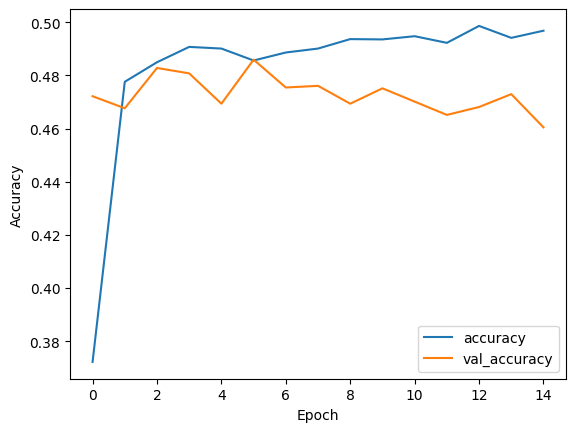

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Finally saving the model

In [10]:
model.save('hand_gesture_recognition_model.keras')

## Compressing the File

In [11]:
import gzip
import shutil

In [12]:
with open('hand_gesture_recognition_model.keras', 'rb') as f_in:
    with gzip.open('hand_gesture_recognition_model.keras.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)